## GRADED CHALLENGE 3


I. PERKENALAN

Nama    : Luvi Puspitasari
Batch   : 11
Phase   : 0


II. IMPORT PUSTAKA

In [2]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
import scipy.stats as st
from scipy import stats
import seaborn as sns

III. DATA LOADING


In [3]:
# Berikut terlampir data yang akan diolah sebagai berikut :

df = pd.read_csv('ks-projects-201801.csv')
df

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [5]:
old_data = df.shape
old_data

(378661, 15)

In [8]:
df.groupby("deadline", sort=False) ["usd_goal_real"].sum()

deadline
2015-10-09    14502239.94
2017-11-01     6500706.64
2013-02-26     1273629.71
2012-04-16     2144155.22
2015-08-29     5203847.89
                 ...     
2009-07-03        3000.00
2009-08-25       15000.00
2009-07-26        3000.00
2009-07-30        4600.00
2009-12-28        3500.00
Name: usd_goal_real, Length: 3164, dtype: float64

IV. DATA CLEANING

In [14]:
# Memberi nama baru pada setiap kolom
project = df.copy()
renamed_project = project.rename(
    columns={"[index]":"Number","name":"Project_Name","ID":"ID Project", "category":"Category","main_category":"Main_Category",
            "currency":"Currency","deadline":"Deadline","goal":"Goal","launched":"Launched","pledged":"Pledged",
            "state":"Status","backers":"Backers","country":"Country","usd pledged":"USD Pledged","usd_pledged_real":"USD_Pledgeg_Real","usd_goal_real":"USD_Goal_Real"}, inplace=True
)

In [15]:
project

,ID Project,Project_Name,Category,Main_Category,Currency,Deadline,Goal,Launched,Pledged,Status,Backers,Country,USD Pledged,USD_Pledgeg_Real,USD_Goal_Real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378656,999976400,ChknTruk Nationwide Charity Drive 2014 (Canceled),Documentary,Film & Video,USD,2014-10-17,50000.0,2014-09-17 02:35:30,25.0,canceled,1,US,25.0,25.0,50000.00
378657,999977640,The Tribe,Narrative Film,Film & Video,USD,2011-07-19,1500.0,2011-06-22 03:35:14,155.0,failed,5,US,155.0,155.0,1500.00
378658,999986353,Walls of Remedy- New lesbian Romantic Comedy f...,Narrative Film,Film & Video,USD,2010-08-16,15000.0,2010-07-01 19:40:30,20.0,failed,1,US,20.0,20.0,15000.00
378659,999987933,BioDefense Education Kit,Technology,Technology,USD,2016-02-13,15000.0,2016-01-13 18:13:53,200.0,failed,6,US,200.0,200.0,15000.00


In [18]:
# Menghapus kolom yang tidak dipakai
# Missing Value
# dropna function in pandas removes all the rows with missing value
project.dropna(inplace=True)

# Putting axis = 1 removes the columns with missing value
project.dropna(inplace=True, axis=1)

# Old Data Frame vs New Data Frame after deleted missing value

new_data = project.shape
print("Old shape:", old_data)
print("New shape: ", new_data)


Old shape: (378661, 15)
New shape:  (374860, 15)


In [19]:
# Drop Duplicate Rows
project.drop_duplicates()
#Drop duplicate ID Project
project = project.sort_values('Project_Name', ascending=False).drop_duplicates(['ID Project'])
print('Hasil jumlah ID Project yang sudah dihilangkan duplikasinya adalah', project['ID Project'].count())

Hasil jumlah ID Project yang sudah dihilangkan duplikasinya adalah 374860


V. Data Exploration

In [20]:
# Membuat query terhadap dataset
# Menampilkan Data Query Total 

project[
        (project["USD_Goal_Real"] > 25000000) &
        (project["Goal"] > 25000000)
]


,ID Project,Project_Name,Category,Main_Category,Currency,Deadline,Goal,Launched,Pledged,Status,Backers,Country,USD Pledged,USD_Pledgeg_Real,USD_Goal_Real
363500,92208526,game. a new vision from todd harris. (Canceled),Video Games,Games,USD,2015-07-09,50000000.0,2015-06-09 22:04:58,250.0,canceled,25,US,250.00,250.00,5.000000e+07
175387,1891988483,equal rights for all campaign,Journalism,Journalism,USD,2015-04-01,35000000.0,2015-03-02 20:21:11,0.0,failed,0,US,0.00,0.00,3.500000e+07
289455,542785430,Wireless Typewriter (Suspended) (Suspended) (S...,Technology,Technology,USD,2016-01-12,40000000.0,2015-11-13 18:45:19,2.0,suspended,2,US,2.00,2.00,4.000000e+07
72990,1371612630,Wax Apple,Documentary,Film & Video,USD,2014-12-17,100000000.0,2014-12-16 15:43:58,0.0,failed,0,US,0.00,0.00,1.000000e+08
211026,2075450016,"Virtual Reality Playground in Buffalo, NY",Live Games,Games,USD,2015-06-28,100000000.0,2015-05-14 02:31:39,20.0,failed,1,US,20.00,20.00,1.000000e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377444,993969686,Albert Einstein Museum,Technology,Technology,USD,2014-12-20,50000000.0,2014-10-23 01:46:17,240.0,failed,8,US,240.00,240.00,5.000000e+07
196531,2000749004,A Celtic Lovestory,Drama,Film & Video,GBP,2015-11-30,100000000.0,2015-11-17 00:47:15,0.0,failed,0,GB,0.00,0.00,1.513959e+08
212541,2083255961,A Billion Pixels...,Web,Technology,USD,2014-08-04,100000000.0,2014-06-05 23:39:34,56.0,failed,6,US,56.00,56.00,1.000000e+08
183294,1933151256,404 ERROR - The first emergency kit for an int...,Apps,Technology,EUR,2015-06-30,80000000.0,2015-06-15 11:40:42,1.0,canceled,1,NL,1.13,1.11,8.876757e+07


Dari data diatas dapat disimpulkan bahwa ada 74 Project yang memenuhi target (Goal) secara nilai project

In [21]:
# Grouping Dataset

project.groupby("Main_Category", sort=False) ["USD_Goal_Real"].sum()

Main_Category
Technology      3.327914e+09
Publishing      9.866766e+08
Music           7.885731e+08
Games           1.582558e+09
Film & Video    5.249839e+09
Design          1.258992e+09
Food            1.206404e+09
Photography     1.322236e+08
Journalism      4.089290e+08
Dance           3.608882e+07
Art             1.103523e+09
Theater         2.955899e+08
Fashion         5.112420e+08
Comics          2.117433e+08
Crafts          9.191721e+07
Name: USD_Goal_Real, dtype: float64

In [22]:
Main_Category_Total = project['USD_Goal_Real'].sum()
Main_Category_Total

17192213915.73

Total untuk project keseluruhan adalah $ 1,721.1809,113.309998, untuk lebih detailnya dapat dilihat di data Main_category saat di groupby

In [68]:
# Data Vizualitation

data = project.groupby('Main_Category').count().reset_index()
data.sort_values('USD_Goal_Real', ascending=True, inplace=True)
data.head(15)

,Main_Category,ID Project,Project_Name,Category,Currency,Deadline,Goal,Launched,Pledged,Status,Backers,Country,USD Pledged,USD_Pledgeg_Real,USD_Goal_Real
3,Dance,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767,3767
9,Journalism,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754,4754
2,Crafts,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809,8809
11,Photography,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778,10778
1,Comics,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819,10819
14,Theater,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912,10912
5,Fashion,22812,22812,22812,22812,22812,22812,22812,22812,22812,22812,22812,22812,22812,22812
7,Food,24599,24599,24599,24599,24599,24599,24599,24599,24599,24599,24599,24599,24599,24599
0,Art,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152,28152
4,Design,30066,30066,30066,30066,30066,30066,30066,30066,30066,30066,30066,30066,30066,30066


<function matplotlib.pyplot.show(close=None, block=None)>

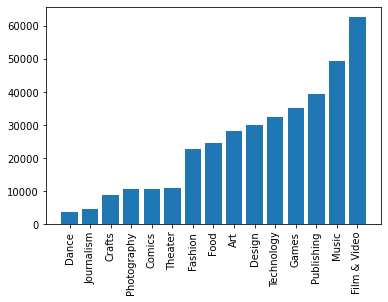

In [27]:
fig = plt.figure(figsize=(6,4))
ax = plt.axes()
ax.bar(data['Main_Category'], data['USD_Goal_Real'])
plt.xticks(rotation=90)
plt.show

From the graph, we could observe that 'Dance' makes the least money than others. And the highest is Film & Video

### ASSIGNMENT RUBICS

VI. MEASURE of CENTRAL TENDENCY
- Mean
- Median
- Modus

In [ ]:
# Mean
print('Mean: '+ str(project['USD_Goal_Real'].mean()))

# Median
print('Median: '+ str(project['USD_Goal_Real'].median()))

# Modus
print('Mode: '+ str(project['USD_Goal_Real'].mode()))


Mean: 45454.40146545336
Median: 5500.0
Mode: 0    5000.0
dtype: float64


#### VII. MEASURE of VARIANCE
- Range
- Variance
- Standard Deviation

In [54]:
# Data process

goal_real = pd.DataFrame(project[{'USD_Pledgeg_Real','USD_Goal_Real','Main_Category'}])

In [60]:
# Get the Range 

numcols = ['USD_Pledgeg_Real', 'USD_Goal_Real']
for col in numcols:
    print(goal_real[col].name + ' range :' + str(goal_real[col].max() - goal_real[col].min()))

USD_Pledgeg_Real range :20338986.27
USD_Goal_Real range :166361390.70000002


We get 2 range
 1. USD_Pledgeg_Real range :20338986.27
 2. USD_Goal_Real range :166361390.70000002
but in this process have weakness because just including 2 values, largeest and smallest values in a dataset

In [65]:
# Get the Variance
print('USD_Pledgeg_Real variance : ' + str(goal_real['USD_Pledgeg_Real'].var()))
print('USD_Goal_Real variance : ' + str(goal_real['USD_Goal_Real'].var()))

USD_Pledgeg_Real variance : 8339286590.89376
USD_Goal_Real variance : 1342741824114.046


We get 2 variance
    1. USD_Pledgeg_Real variance : 8339286590.89376
    2. USD_Goal_Real variance : 1342741824114.046
it gives data points varied from the dataset. But we have weakness if we used variance metode, we have no value from dataset entry, so we can solve it with Standart Deviation

In [67]:
# Standart Deviation

print('USD_Pledgeg_Real Standart Deviation : ' + str(goal_real['USD_Pledgeg_Real'].std()))
print('USD_Goal_Real Standart Deviation : ' + str(goal_real['USD_Goal_Real'].std()))

USD_Pledgeg_Real Standart Deviation : 91319.69443057592
USD_Goal_Real Standart Deviation : 1158767.3727345131


In Standart Deviation, we got 2 values
    1. USD_Pledgeg_Real Standart Deviation : 91319.69443057592
    2. USD_Goal_Real Standart Deviation : 1158767.3727345131

In [84]:
# Confidence Intervals

data_goal_real = pd.DataFrame(project['USD_Goal_Real'])
data_pledgeg_real = pd.DataFrame(project['USD_Pledgeg_Real'])

# Confidence Interval 90% from USD_Goal_Real
st.t.interval(alpha=0.90, df=len(data_goal_real)-1,
                loc=np.mean(data_goal_real),
                scale=st.sem(data_goal_real))


(array([42749.94771613]), array([48976.10422716]))

In [85]:
# Confidence Interval 90% from USD_Pledgeg_Real
st.t.interval(alpha=0.90, df=len(data_pledgeg_real)-1,
                loc=np.mean(data_pledgeg_real),
                scale=st.sem(data_pledgeg_real))

(array([8875.56427244]), array([9366.23282546]))

We got 2 Confidence Interval 90%:
from USD_Goal_Real's data = (array([42749.94771613]), array([48976.10422716])
from data USD_Pledgeg_Real's data = (array([8875.56427244]), array([9366.23282546]))


#### VIII. Hypothesis Testing

In [90]:
# Single Sample Hypothesis Testing
data['USD'] = data['USD_Goal_Real']
data['date'] = data['Deadline']
all_project = data[['USD','date']].groupby('date').sum()
print('Average All Project: $ {}'.format(np.round(all_project['USD'].mean())))


Average All Project: $ 24991.0


In [91]:
all_project

,USD
date,
3767,3767
4754,4754
8809,8809
10778,10778
10819,10819
10912,10912
22812,22812
24599,24599
28152,28152


In [97]:
t_stat,p_val = stats.ttest_1samp(all_project.USD, 24991)
print('P-value:',p_val/2)
print('t-statistics:',t_stat)

P-value: 0.49997063788854296
t-statistics: -7.492485674768537e-05


/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


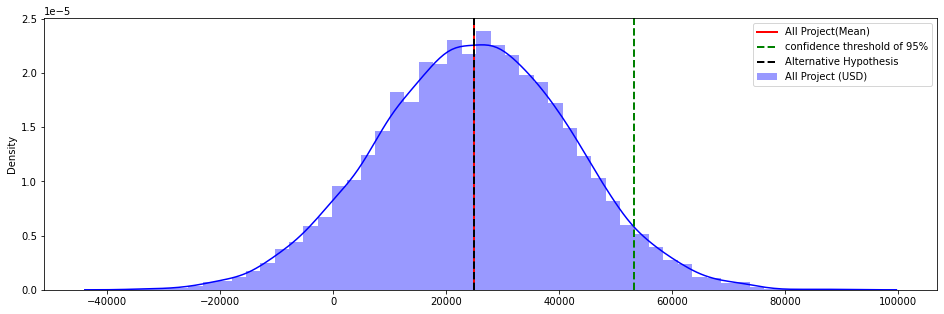

In [106]:
all_project_pop = np.random.normal(all_project.USD.mean(), all_project.std(), 10000)

ci = stats.norm.interval(0.90, all_project.USD.mean(), all_project.USD.std())
plt.figure(figsize=(16,5))
sns.distplot(all_project_pop, label='All Project (USD)', color='blue')
plt.axvline(all_project.USD.mean(), color='red', linewidth=2, label='All Project(Mean)')
plt.axvline(ci[1], color='green', linestyle='dashed', linewidth=2, label='confidence threshold of 95%')
plt.axvline(all_project_pop.mean() + t_stat*all_project_pop.std(), color='black', linestyle='dashed', linewidth=2, label = 'Alternative Hypothesis')
plt.legend()


Conclusion:

- Based on data, overall on many country, we get conclution about the largest project is Film and Video
- Missing value has been deleted
    Old shape: (378661, 15)
    New shape:  (374860, 15)
- The mean result at data is $ 45454.40 (2009-12-28 until 2015-10-09)
- Average All Project $ 24991 / years
